# Prediction of Students Grades Using Linear Regression Techniques

## Introduction

#### In this notebook,Linear Regression is implemented to predict student's grades. Through machine learning process, cleaning the data, interpretation and presentation of the results is done.

## Objectives:
1. To accurately predict the grades of student
2. To read, examine data and visualize the results
3. To check the prediction accuracy


### Linear regression 

In [34]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle

### Data prediction and Prediction Accuracy

In [31]:
# data =pd.read_csv("student-mat.csv",sep=";")
data=data[["G1","G2","G3","studytime","failures","absences","freetime","age"]]
predict="G3"

x= np.array(data.drop([predict],1))
y= np.array(data[predict])

x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(x,y,test_size= .2)

linear =linear_model.LinearRegression()
linear.fit(x_train, y_train)
linear.score(x_test,y_test)
acc= linear.score(x_test,y_test)

prediction= linear.predict(x_test)

for i in range (len(prediction)):
  print(prediction[i],x_test[i],y_test[i])

print(acc)


6.260893784147028 [ 8  8  1  3  2  5 17] 10
11.90871667058993 [14 12  1  0  3  3 18] 12
3.197838171469524 [ 3  5  2  1  8  3 18] 5
8.601631556482669 [ 8  9  2  0  8  3 16] 10
7.620669206584592 [ 9  9  2  2 11  5 20] 9
12.392311876683758 [12 13  2  0  0  3 18] 13
18.94421938692939 [19 18  2  0  2  3 15] 18
7.381780254345536 [ 9  7  2  0 18  4 16] 6
6.926733332851889 [ 8  8  2  0  0  3 18] 0
12.964338509643078 [11 13  2  0  2  4 15] 14
15.394385637353194 [14 15  2  0  0  5 15] 15
6.321494795647119 [ 7  7  3  0  6  4 17] 7
13.656547943328508 [12 14  3  0  1  4 17] 15
11.41772128544735 [11 12  1  0  0  4 18] 10
14.07354342315056 [15 14  2  0  8  2 18] 14
8.126292426169435 [11  8  2  0  2  4 15] 8
6.423440138589809 [ 8  7  2  0  0  4 16] 8
10.502491232960324 [11 11  2  0  2  4 18] 11
15.09393410455178 [16 15  3  0  0  3 17] 15
8.24799567934133 [10  9  4  0  0  4 18] 0
14.352776515337933 [14 14  1  0  4  4 16] 14
16.067926612037056 [14 16  1  0  3  4 17] 16
14.879152308877408 [14 15  2  0  0

In [16]:
import pandas as pd
import numpy as np
np.random.seed(42)

 
# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (9, 9)

import seaborn as sns

from IPython.core.pylabtools import figsize

# Scipy helper functions
from scipy.stats import percentileofscore
from scipy import stats

In [17]:
# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Distributions
import scipy

#### Read and Examine Data

In [20]:
# Read in class scores
df = pd.read_csv("student-mat.csv",sep=";")

# Filter out grades that were 0
df = df[~df['G3'].isin([0, 1])]

df = df.rename(columns={'G3': 'Grade'})

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [21]:
df.shape

(357, 33)

#### Description in Numerical  Columns

In [22]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,16.655462,2.795518,2.546218,1.431373,2.042017,0.271709,3.955182,3.246499,3.098039,1.495798,2.330532,3.549020,6.316527,11.268908,11.358543,11.523810
std,1.268262,1.093999,1.084217,0.686075,0.831895,0.671750,0.885721,1.011601,1.090779,0.919886,1.294974,1.402638,8.187623,3.240450,3.147188,3.227797
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,5.000000,4.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,2.000000,9.000000,9.000000,9.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,14.000000,14.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


#### Counting Values for Categorical Columns

In [23]:
# Print the value counts for categorical columns
for col in df.columns:
    if df[col].dtype == 'object':
        print('\nColumn Name:', col,)
        print(df[col].value_counts())


Column Name: school
GP    315
MS     42
Name: school, dtype: int64

Column Name: sex
F    185
M    172
Name: sex, dtype: int64

Column Name: address
U    279
R     78
Name: address, dtype: int64

Column Name: famsize
GT3    250
LE3    107
Name: famsize, dtype: int64

Column Name: Pstatus
T    318
A     39
Name: Pstatus, dtype: int64

Column Name: Mjob
other       127
services     94
teacher      54
at_home      50
health       32
Name: Mjob, dtype: int64

Column Name: Fjob
other       196
services    100
teacher      26
health       18
at_home      17
Name: Fjob, dtype: int64

Column Name: reason
course        126
reputation     99
home           97
other          35
Name: reason, dtype: int64

Column Name: guardian
mother    248
father     82
other      27
Name: guardian, dtype: int64

Column Name: schoolsup
no     307
yes     50
Name: schoolsup, dtype: int64

Column Name: famsup
yes    219
no     138
Name: famsup, dtype: int64

Column Name: paid
no     184
yes    173
Name: paid, dty

#### Grades Distribution

In [24]:
df['Grade'].describe()

count    357.000000
mean      11.523810
std        3.227797
min        4.000000
25%        9.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: Grade, dtype: float64

In [25]:
df['Grade'].value_counts()

10    56
11    47
15    33
8     32
12    31
13    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
20     1
4      1
Name: Grade, dtype: int64

## Visualization:Distribution of Final Grades

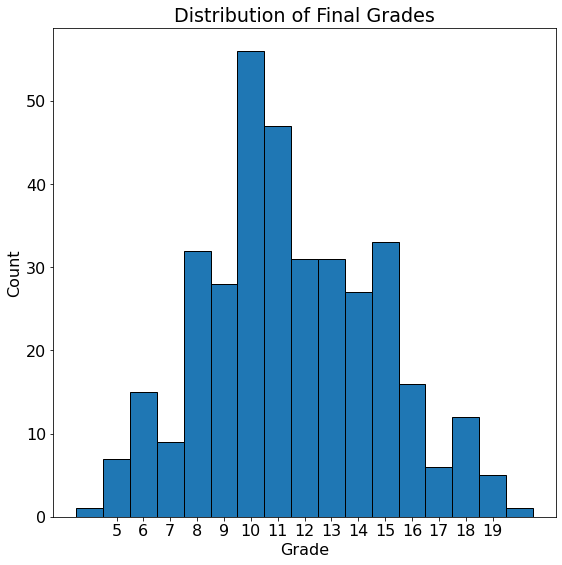

In [26]:
# Bar plot of grades
plt.bar(df['Grade'].value_counts().index, 
        df['Grade'].value_counts().values,
         fill = 'navy', edgecolor = 'k', width = 1)
plt.xlabel('Grade'); plt.ylabel('Count'); plt.title('Distribution of Final Grades');
plt.xticks(list(range(5, 20)));